In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/CS7643-project/scripts/

/content/drive/.shortcut-targets-by-id/1xF6535u4rFTdu6RjWzY8tTNa5vPgSP5s/CS7643-project/scripts


In [20]:
from pandas import DataFrame, read_csv
from matplotlib import pyplot
from numpy import nan

In [26]:
def get_datalist(fpath):
  d = read_csv(fpath, header=None)
  d.columns = ["dummy"]
  d.dropna(inplace=True)
  return d["dummy"].to_list()

d_train = DataFrame(columns=["epoch"])
d_train["epoch"] = list(range(1, 101))
d_val = DataFrame(columns=["epoch", "ResNet-50", "VGG-19BN", "ResNet-18"])
d_val.loc[:, :] = nan
epoch_val1 = list(range(5, 101, 5))
epoch_val2 = list(range(1, 101))
d_val.loc[:, "epoch"] = epoch_val2

d_train["ResNet-50"] = get_datalist('results_resnet50/train_loss_resnet50.txt')
d_train["VGG-19BN"] = get_datalist('results_vgg/run1_train_loss.txt')[:100]
d_train["ResNet-18"] = get_datalist('results_EfficientNet/train_loss_resnet50.txt')[:100]
d_val.loc[d_val["epoch"].isin(epoch_val1), "ResNet-50"] = get_datalist('results_resnet50/val_loss_resnet50.txt')
d_val.loc[d_val["epoch"].isin(epoch_val1), "VGG-19BN"] = get_datalist('results_vgg/run1_val_loss.txt')
d_val.loc[:, "ResNet-18"] = get_datalist('results_EfficientNet/val_loss_resnet50.txt')[:100]

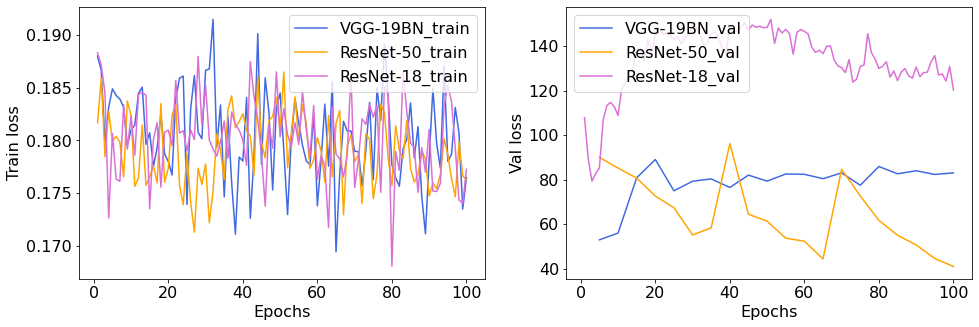

In [38]:
pyplot.rcParams['figure.figsize'] = [16,5]
pyplot.rcParams.update({'font.size': 16})

model_colors = {"VGG-19BN": "royalblue", "ResNet-50": "orange", "ResNet-18": "orchid"}
_ = pyplot.subplot(1,2,1)
for k,v in model_colors.items():
  _ = pyplot.plot(d_train["epoch"], d_train[k], label=k + "_train", color=v)
_ = pyplot.xlabel("Epochs")
_ = pyplot.ylabel("Train loss")
_ = pyplot.legend()

_ = pyplot.subplot(1,2,2)
for k,v in model_colors.items():
  _ = pyplot.plot(d_val[["epoch", k]].dropna()["epoch"], d_val[["epoch", k]].dropna()[k], label=k + "_val", color=v)
_ = pyplot.xlabel("Epochs")
_ = pyplot.ylabel("Val loss")
_ = pyplot.legend(loc='upper left')